<h1> GPU and Parallel CPU tests </h1>

Time GPU vs. CPU/frame to see if worth adupting code for GPU use:

In [1]:
%matplotlib notebook 
%load_ext autoreload
%autoreload 2


import numpy as np
import numba
from numba import cuda, vectorize
import pycuda.gpuarray

import multiprocessing as mp

from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


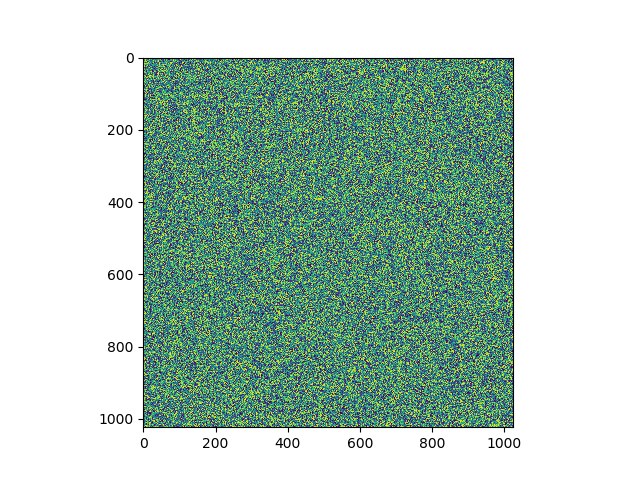

In [2]:
# create a fake frame (just random numbers)
frame = np.random.randint(0,255,(1024,1024))
plt.imshow(frame)

In [3]:
%%timeit
CPU_fft = np.fft.fft2(frame)

3.2 ms ± 19 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1]:
import skcuda.fft as cu_fft

AttributeError: /usr/local/cuda-10.0/targets/x86_64-linux/lib/libcufft.so: undefined symbol: cufftSetCompatibilityMode

In [ ]:
%%timeit
frame_complex = frame.astype(np.complex64)
d_frame_complex = cuda.to_device(frame_complex)
GPU_fft = fft_inplace(d_frame_complex)